In [1]:
import pandas as pd       
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("test.csv") # reading of dataset
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [4]:
df.shape

(23490, 13)

In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


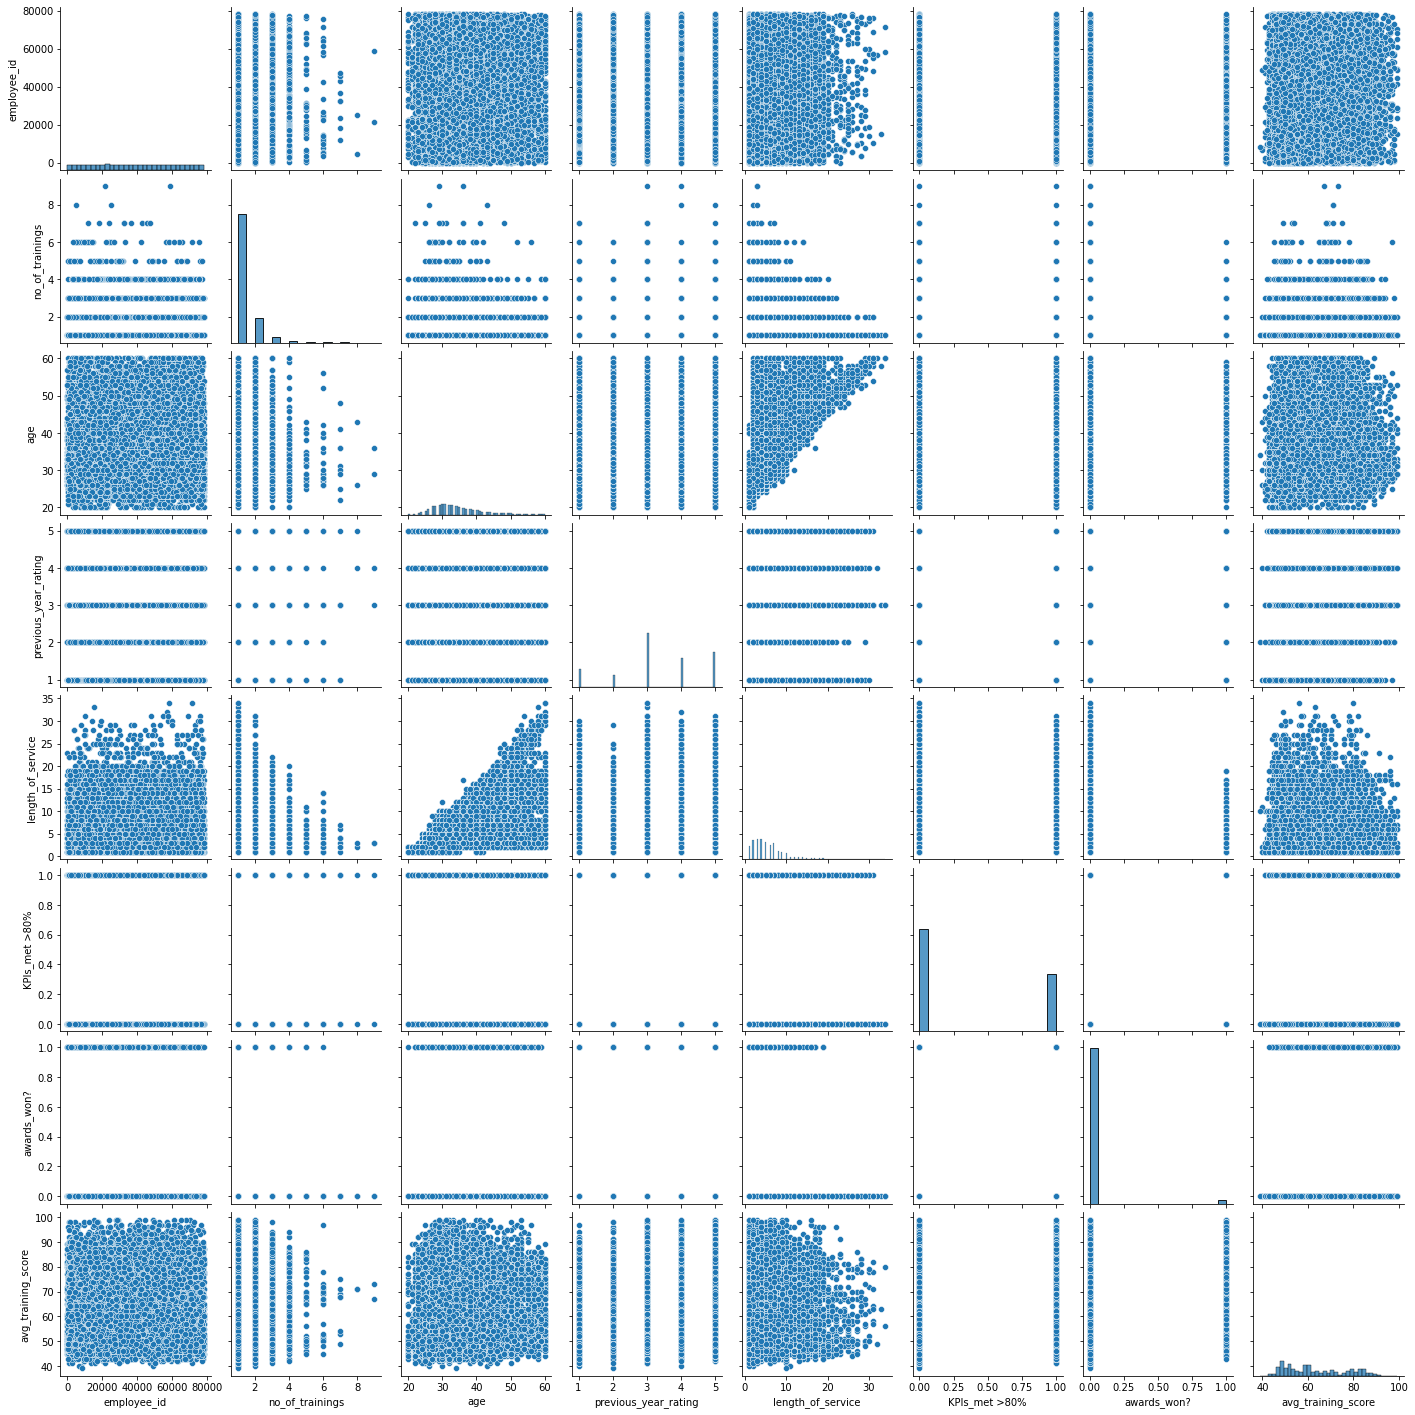

In [6]:
sns.pairplot(df)    # an overview how dataset look

##  A] EDA AND PREPROCESSING FOR DATA

### 1] DROPPING THE UNWANTED COLUMNS

In [7]:
df.drop(["employee_id","region"],inplace=True,axis=1)

### 2] FINDING THE NAN VALUE IN DATASET

In [8]:
df.isnull().sum()

department                 0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### 3] DROPPING THE NAN VALUES FROM DATASET

In [9]:
df.dropna(inplace=True)   # dropping of nan values row as it is consist of 11% of data 

In [10]:
df.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### 4] RENAMING THE COLUMN FOR EASE IN UNDERSTANDING

In [11]:
df=df.rename(columns={"KPIs_met >80%":"key_performance_indi","awards_won?":"awards"})

In [12]:
df    # Final Dataset

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
1,HR,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...
23484,Sales & Marketing,Bachelor's,m,other,1,28,4.0,2,0,0,51
23485,Legal,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50


## B] VISUALISATION

###  1] COUNTING FOR DEPARTMENT IN TOTAL AND COUNT OF IT

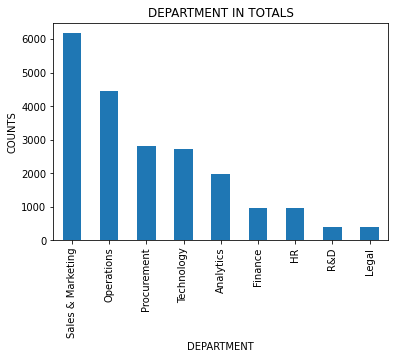

In [13]:
df['department'].value_counts().plot(kind='bar')
plt.title("DEPARTMENT IN TOTALS")
plt.ylabel("COUNTS")
plt.xlabel("DEPARTMENT")
plt.xticks(rotation=90)
plt.show()

In [14]:
df["department"].value_counts()

Sales & Marketing    6176
Operations           4434
Procurement          2804
Technology           2725
Analytics            1960
Finance               974
HR                    972
R&D                   391
Legal                 383
Name: department, dtype: int64

### 2]  DEPARTMENT WITH MOST AWARDS

Text(0.5, 1.0, 'AWARDS IN DEPARTMENT')

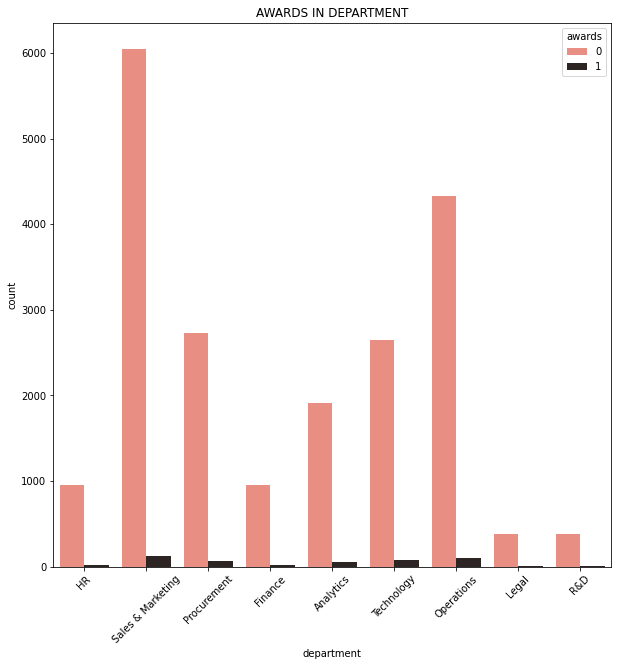

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x="department",hue="awards",data=df, palette='dark:salmon_r')
plt.xticks(rotation=45)
plt.title("AWARDS IN DEPARTMENT")


In [16]:
df[(df["awards"]== 1)&(df["department"])] # showing the data consisting of award won

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
25,Operations,Bachelor's,m,other,1,33,3.0,7,1,1,62
124,Technology,Master's & above,m,other,1,39,5.0,4,0,1,81
262,Procurement,Bachelor's,m,other,1,38,4.0,2,1,1,97
293,Procurement,Master's & above,f,other,1,37,3.0,2,1,1,97
298,Operations,Master's & above,f,sourcing,2,36,1.0,6,1,1,65
...,...,...,...,...,...,...,...,...,...,...,...
23161,Technology,Bachelor's,m,sourcing,2,30,3.0,2,1,1,76
23188,HR,Master's & above,f,sourcing,1,34,5.0,6,1,1,95
23310,Sales & Marketing,Bachelor's,f,other,1,27,4.0,4,1,1,52
23428,Sales & Marketing,Bachelor's,m,other,1,33,3.0,3,1,1,51


In [17]:
df[(df["awards"]==1)& (df["department"]=="Sales & Marketing")]  # by interpreting the above graph  MAX AWARDS

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
399,Sales & Marketing,Bachelor's,f,other,1,58,3.0,2,1,1,48
411,Sales & Marketing,Bachelor's,m,sourcing,4,29,3.0,8,0,1,51
437,Sales & Marketing,Bachelor's,f,other,1,28,2.0,5,1,1,45
640,Sales & Marketing,Bachelor's,m,other,1,42,5.0,7,1,1,91
745,Sales & Marketing,Bachelor's,m,sourcing,1,32,5.0,6,1,1,46
...,...,...,...,...,...,...,...,...,...,...,...
22914,Sales & Marketing,Bachelor's,m,other,1,43,4.0,2,1,1,43
23031,Sales & Marketing,Bachelor's,m,sourcing,1,32,3.0,7,1,1,51
23310,Sales & Marketing,Bachelor's,f,other,1,27,4.0,4,1,1,52
23428,Sales & Marketing,Bachelor's,m,other,1,33,3.0,3,1,1,51


In [18]:
df[(df["awards"]==1)& (df["department"]=="Operations")]  # Runnerup in award winning

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
25,Operations,Bachelor's,m,other,1,33,3.0,7,1,1,62
298,Operations,Master's & above,f,sourcing,2,36,1.0,6,1,1,65
548,Operations,Master's & above,f,other,2,34,5.0,5,0,1,75
805,Operations,Master's & above,m,referred,3,37,4.0,10,0,1,71
953,Operations,Master's & above,m,sourcing,2,46,3.0,12,0,1,68
...,...,...,...,...,...,...,...,...,...,...,...
21405,Operations,Bachelor's,m,sourcing,1,29,1.0,3,1,1,58
21421,Operations,Master's & above,m,other,1,47,3.0,19,0,1,96
21520,Operations,Master's & above,m,sourcing,1,30,3.0,7,1,1,59
22822,Operations,Master's & above,m,other,2,36,5.0,4,1,1,60


### 3]  COUNTING FOR MOST PEOPLE WITH EDUCATION QUALIFICATION 

Text(0.5, 1.0, 'EDUCATION')

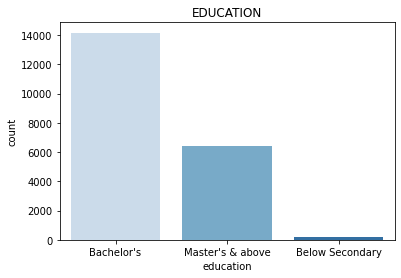

In [19]:
sns.countplot(x="education",data=df,palette='Blues')
plt.title("EDUCATION")

<AxesSubplot:xlabel='education', ylabel='count'>

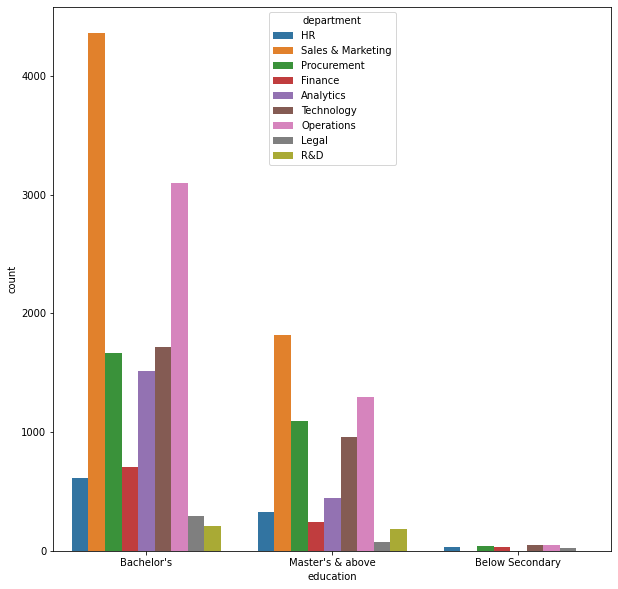

In [20]:
plt.figure(figsize=[10,10])          # counting according to department
sns.countplot(x="education",hue="department",data=df)


### 4]  GENDER CLASSIFICATION IN DATASET

Text(0.5, 1.0, 'GENDER COUNT')

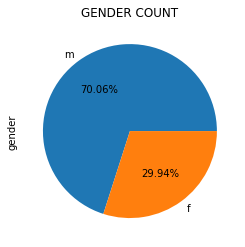

In [21]:
df["gender"].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("GENDER COUNT")


In [22]:
df['gender'].value_counts() # for overview of count

m    14585
f     6234
Name: gender, dtype: int64

### 5]  TRAINING EMPLOYEE RECIVIED DURING HIS CARRIER 

Text(0.5, 0, 'NO OF  TIMES TRAINING RECIEVED')

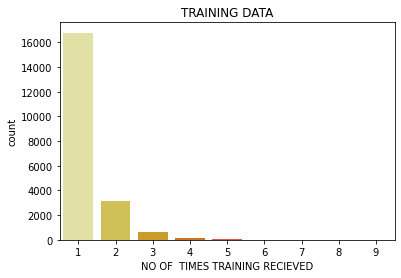

In [23]:
sns.countplot(x='no_of_trainings',data=df,color='yellow',palette='CMRmap_r')
plt.title("TRAINING DATA")
plt.xlabel("NO OF  TIMES TRAINING RECIEVED")

In [24]:
df["no_of_trainings"].value_counts()

1    16790
2     3165
3      639
4      161
5       33
6       19
7        8
8        2
9        2
Name: no_of_trainings, dtype: int64

In [25]:
df[df["no_of_trainings"]==9]    # count for the 9 time training received people

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
8806,Procurement,Bachelor's,f,other,9,36,4.0,3,1,0,73
12665,Procurement,Bachelor's,m,sourcing,9,29,3.0,3,0,0,67


### 6]  PREVIOUS YEAR RATING  OF EMPLOYEES

In [26]:
df["previous_year_rating"].value_counts()

3.0    7565
5.0    4940
4.0    4115
1.0    2541
2.0    1658
Name: previous_year_rating, dtype: int64

<AxesSubplot:ylabel='previous_year_rating'>

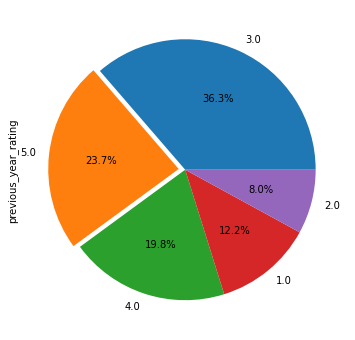

In [27]:
plt.figure(figsize=(6,6))
df["previous_year_rating"].value_counts().plot(kind='pie',autopct="%2.1f%%",explode=(0,0.05,0,0,0))

In [28]:
df[df["previous_year_rating"]==5.0].head() # employe with 5 ratings

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
6,Finance,Bachelor's,m,other,1,33,5.0,3,1,0,57
9,Technology,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76
10,Sales & Marketing,Bachelor's,m,sourcing,2,40,5.0,12,1,0,50
14,Operations,Bachelor's,m,sourcing,1,30,5.0,6,1,0,58
16,Operations,Bachelor's,f,sourcing,1,26,5.0,3,0,0,56


###  7]  YEAR OF EXPERIENCE/ LENGTH OF SERVICES

Text(0, 0.5, 'COUNTS')

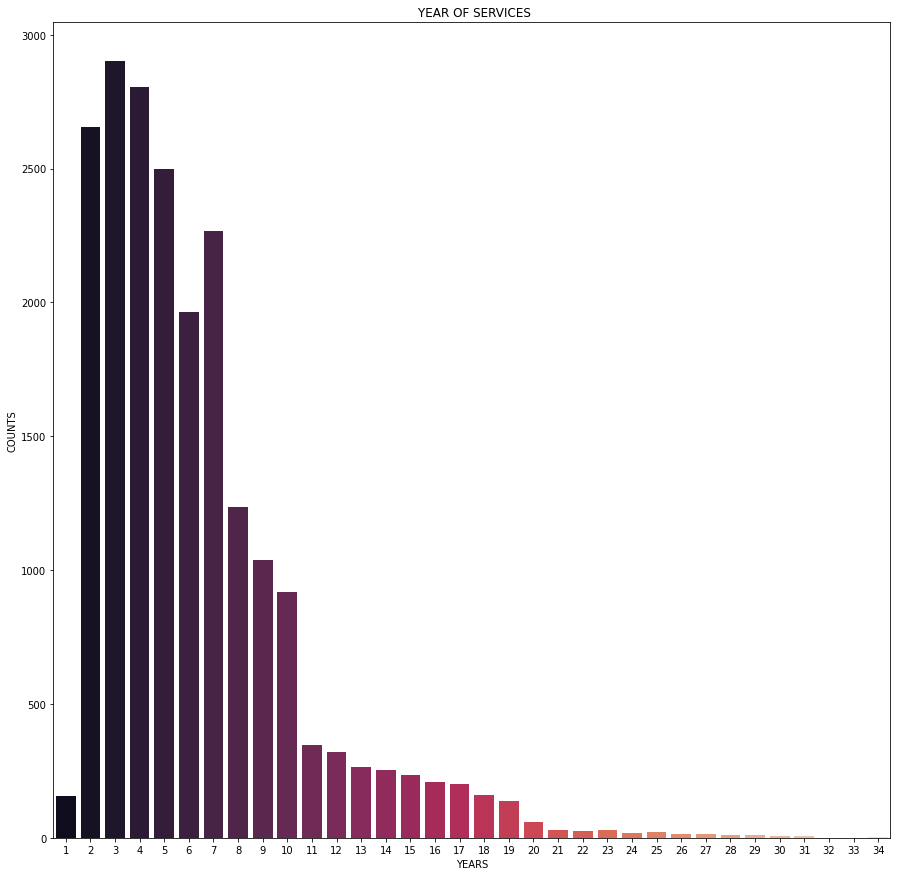

In [29]:
plt.figure(figsize=(15,15))
sns.countplot(x="length_of_service",data=df,palette='rocket')
plt.title(" YEAR OF SERVICES")
plt.xlabel("YEARS")
plt.ylabel("COUNTS")

In [30]:
df[df["length_of_service"]>20]

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
50,Technology,Master's & above,f,other,1,57,1.0,26,0,0,76
88,Operations,Bachelor's,f,other,1,54,4.0,22,0,0,57
165,HR,Bachelor's,f,other,1,53,4.0,21,0,0,53
213,Procurement,Bachelor's,f,other,1,48,5.0,21,0,0,69
333,Sales & Marketing,Bachelor's,f,sourcing,1,50,4.0,21,1,0,49
...,...,...,...,...,...,...,...,...,...,...,...
23119,Operations,Master's & above,m,other,2,54,4.0,27,0,0,60
23167,Operations,Master's & above,f,sourcing,1,60,3.0,31,0,0,63
23246,Operations,Bachelor's,m,other,1,58,5.0,29,0,0,67
23271,Operations,Bachelor's,m,sourcing,1,53,4.0,25,0,0,58


### 8] KPI   MORE THAN 80%

A Key Performance Indicator is a measurable value that demonstrates how effectively a company is achieving key business objectives. 
Organizations use KPIs at multiple levels to evaluate their success at reaching targets.
High-level KPIs may focus on the overall performance of the business, while low-level KPIs may focus on processes in departments such as sales, marketing, HR, support and others.

In [31]:
df["key_performance_indi"].value_counts()

0    13274
1     7545
Name: key_performance_indi, dtype: int64

### 9] PEOPLE WITH TRAINING SCORE

Text(0, 0.5, 'SCORE')

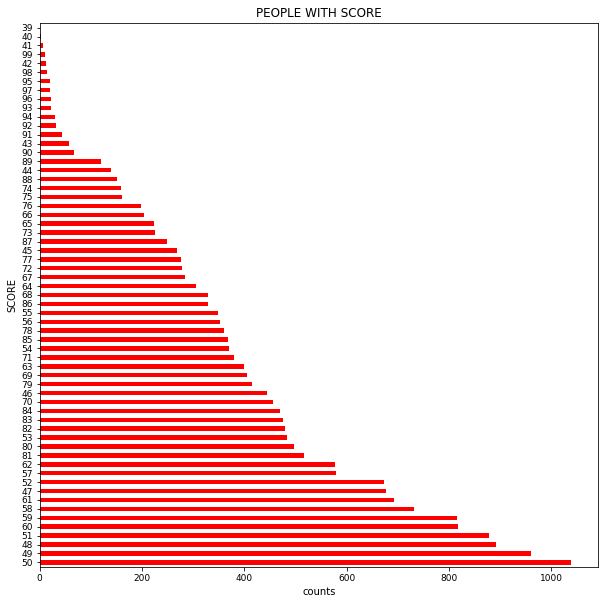

In [32]:
plt.figure(figsize=(10,10))
df["avg_training_score"].value_counts().plot(kind="barh",color="red",fontsize=9)

plt.title("PEOPLE WITH SCORE")
plt.xlabel("counts")
plt.ylabel("SCORE")


In [33]:
df[df["avg_training_score"]>90]

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
78,Analytics,Bachelor's,m,other,1,31,5.0,5,1,0,92
262,Procurement,Bachelor's,m,other,1,38,4.0,2,1,1,97
293,Procurement,Master's & above,f,other,1,37,3.0,2,1,1,97
350,Technology,Bachelor's,m,other,1,28,5.0,2,0,1,95
439,Technology,Bachelor's,m,sourcing,1,26,5.0,4,1,0,94
...,...,...,...,...,...,...,...,...,...,...,...
22677,Operations,Bachelor's,m,sourcing,1,29,3.0,4,1,0,96
22730,Finance,Bachelor's,m,sourcing,1,28,5.0,3,1,0,91
22974,Operations,Bachelor's,m,sourcing,1,31,3.0,2,0,0,99
23188,HR,Master's & above,f,sourcing,1,34,5.0,6,1,1,95


###  10]  RECRUITMENT  PROCESS

In [34]:
df["recruitment_channel"].value_counts()

other       11620
sourcing     8793
referred      406
Name: recruitment_channel, dtype: int64

Text(0.5, 1.0, 'PROCESS OF RECRUITMENT')

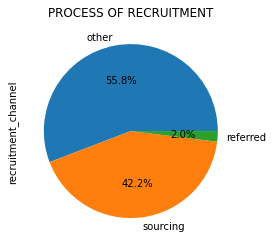

In [35]:
df["recruitment_channel"].value_counts().plot(kind='pie',autopct="%2.1f%%")
plt.title("PROCESS OF RECRUITMENT")

## C] MODEL CREATION

In [36]:
df

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,awards,avg_training_score
1,HR,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...
23484,Sales & Marketing,Bachelor's,m,other,1,28,4.0,2,0,0,51
23485,Legal,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50


###  1]  EDA FOR MODEL CREATION

In [37]:
feature=df.drop("awards",axis=1)
target=df.iloc[:,-2]

In [38]:
from sklearn.preprocessing import LabelEncoder   # converting dataset into numerical
for col in feature:
    le=LabelEncoder()
    feature[col]=le.fit_transform(feature[col])

In [39]:
data=pd.concat([feature,target],axis=1)

In [40]:
data  # final dataset for model creation

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,key_performance_indi,avg_training_score,awards
1,2,0,0,0,0,11,2,4,0,12,0
2,7,0,1,0,0,11,0,3,0,8,0
3,5,0,0,0,2,11,1,8,0,26,0
4,1,0,1,2,0,10,3,6,0,22,0
5,5,0,1,2,0,16,2,1,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...
23484,7,0,1,0,0,8,3,1,0,12,0
23485,3,1,1,2,0,4,2,0,0,22,0
23486,8,0,1,2,0,11,2,6,0,35,0
23487,2,0,0,2,0,6,3,3,0,11,0


### 2] USING SAMPLING METHOD TO BALANCE THE DATA SET

In [41]:
x=data.drop("awards",axis=1)
y=data.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split   # for spliting into training and testing purpose

In [43]:
xtrain,xtest,ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [44]:
data["awards"].value_counts()

0    20333
1      486
Name: awards, dtype: int64

In [45]:
from imblearn.over_sampling import RandomOverSampler
rov=RandomOverSampler(random_state=1)
xsample,ysample=rov.fit_resample(xtrain,ytrain)
pd.Series(ysample).value_counts()

0    16263
1    16263
Name: awards, dtype: int64

###   3]  IMPORTING   NECESSARY MODEL FOR CLASSICATION PROBELMS

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.model_selection import GridSearchCV  # for tuning the model
from sklearn.metrics import classification_report,accuracy_score  # for accuracy and related terms

### 4] IMPLEMENTING MODELS ON DATASET

In [47]:
def mymodels(model):
    model.fit(xsample,ysample)
    ypred=model.predict(xtest)
    print( f"   ACCURACY OF MODEL---:{accuracy_score(ytest, ypred)*100}" )
    print()
    print( f"CLASSIFICATION REPORT OF MODEL-:\n {classification_report(ytest, ypred)}" )

In [48]:
models=[]
models.append((" 1]   RANDOM FOREST-----:",RandomForestClassifier(random_state=1)))
models.append(("2]    K NEIGHBOR CLASSIFIER---:",KNeighborsClassifier()))
models.append(("3]    DECISION  TREE----:", DecisionTreeClassifier(random_state=1)))
models.append(("4]    GRADIENT BOOSTING----:", GradientBoostingClassifier(random_state=1)))


for name,model in models:
    print(name)
    print()
    mymodels(model)
    print()
    print(f"TRAINING DATA ACCURACY---",model.score(xsample,ysample)*100)
    print(f"TESTING DATA ACCURACY---",model.score(xtest,ytest)*100)
    print('---------------------------------------------')
   

 1]   RANDOM FOREST-----:

   ACCURACY OF MODEL---:97.21421709894332

CLASSIFICATION REPORT OF MODEL-:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.08      0.02      0.03        94

    accuracy                           0.97      4164
   macro avg       0.53      0.51      0.51      4164
weighted avg       0.96      0.97      0.96      4164


TRAINING DATA ACCURACY--- 99.98462768246941
TESTING DATA ACCURACY--- 97.21421709894332
---------------------------------------------
2]    K NEIGHBOR CLASSIFIER---:

   ACCURACY OF MODEL---:91.45052833813641

CLASSIFICATION REPORT OF MODEL-:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      4070
           1       0.06      0.18      0.09        94

    accuracy                           0.91      4164
   macro avg       0.52      0.56      0.52      4164
weighted avg       0.96      0.91      0.94      4164

### creating the data frame for ease in view

In [49]:
data = [{"RANDOM FOREST": 97.214, "K NEIGHBOR CLASSIFIER": 91.450, 'DECISION  TREE':95.629,'GRADIENT BOOSTING':73.463},
        {"RANDOM FOREST":99.98, "K NEIGHBOR CLASSIFIER": 97.801, "DECISION  TREE":99.984,"GRADIENT BOOSTING":78.669},
        {"RANDOM FOREST":97.210,"K NEIGHBOR CLASSIFIER":91.450 ,"DECISION  TREE":95.620,"GRADIENT BOOSTING":73.463}]
 
df = pd.DataFrame(data,index=['Accuracy','TRAINING_DATA_ACCURACY',"TESTING_DATA_ACCURACY"])
df

,RANDOM FOREST,K NEIGHBOR CLASSIFIER,DECISION TREE,GRADIENT BOOSTING
Accuracy,97.214,91.450,95.629,73.463
TRAINING_DATA_ACCURACY,99.980,97.801,99.984,78.669
TESTING_DATA_ACCURACY,97.210,91.450,95.620,73.463



From    above   accuracy   charts  we  can  conclude  that --------  
RANDOM -FOREST -CLASSIFIER , K NEIGHBOR CLASSIFIER and DECISION TREE CLASSIFIER  give the maximum accuracy 

so we can do some hyperparameter on these model inorder to increase there accuracy

##  D] HYPER PARAMETER TUNING OF MODELS

### 1]  TUNING FOR KNN MODEL

In [50]:
accuracy=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xsample,ysample)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

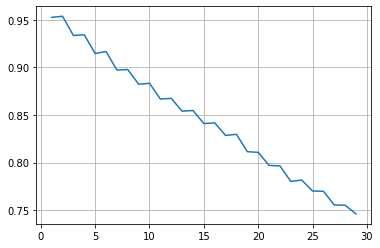

In [51]:
plt.plot(range(1,30),accuracy)
plt.grid()

### E] IMPLEMENTING THE PARAMTER IN MODELS¶

In [52]:
models=[]
models.append(("1]    K NEIGHBOR CLASSIFIER---:", KNeighborsClassifier(n_neighbors=2)))

models.append(("2]    DECISION  TREE----:", DecisionTreeClassifier(criterion='entropy',random_state=6)))

for name,model in models:
    print(name)
    print()
    mymodels(model)
    print()
    print(f"TRAINING DATA ACCURACY---",model.score(xsample,ysample)*100)
    print(f"TESTING DATA ACCURACY---",model.score(xtest,ytest)*100)
    print('---------------------------------------------')
   

1]    K NEIGHBOR CLASSIFIER---:

   ACCURACY OF MODEL---:95.36503362151777

CLASSIFICATION REPORT OF MODEL-:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      4070
           1       0.08      0.11      0.09        94

    accuracy                           0.95      4164
   macro avg       0.53      0.54      0.54      4164
weighted avg       0.96      0.95      0.96      4164


TRAINING DATA ACCURACY--- 99.98462768246941
TESTING DATA ACCURACY--- 95.36503362151777
---------------------------------------------
2]    DECISION  TREE----:

   ACCURACY OF MODEL---:95.7492795389049

CLASSIFICATION REPORT OF MODEL-:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4070
           1       0.09      0.10      0.09        94

    accuracy                           0.96      4164
   macro avg       0.53      0.54      0.54      4164
weighted avg       0.96      0.96      0.96      4164


In [53]:
#for ease in view
data = [{ "BEFORE TUNING": 91.450, "AFTER TUNING": 95.365},
        { "BEFORE TUNING": 95.629, "AFTER TUNING": 95.749}]
 
df = pd.DataFrame(data,index=['K NEIGHBOR CLASSIFIER','DECISION TREE'])
df


,BEFORE TUNING,AFTER TUNING
K NEIGHBOR CLASSIFIER,91.450,95.365
DECISION TREE,95.629,95.749


### FINDING OVERALL ACCURACY OF DATASET

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cvs1 = cross_val_score(KNeighborsClassifier(), x,y, cv=4)
print(f"Average  Accuracy -: {cvs1.mean()*100} ") 

Average  Accuracy -: 97.56952366501494 


### CONCLUSION

                                        A] PREPROCESSING

    1] we can determine that the mean average age in data set is 60 years
    
    2] Maximum  length of service is of 34 years

    3] shape of dataset is (23490, 13)

    4] That data is highly scatter and imbalanced


                                       B] VISUALISATION

    1] There are almost 9 department out of whcich Sales & Marketing have maximum count of people in ti followed by operations
    
    2] We came to conclusion that Sales & Marketing have won most of tha award

    3] There are almost 14k+ candidate having Bacherlor's degree while 6k+ having master degree

    4] The most Educated candidate are from Sales & Marketing as they have to deal with different customer base  

    5] There are almost 16k candidate who have received training once so company's hr can take this into consideration while hiring the candidiate
    
    6] The rating is also and imp factor in term of hr candidate selection as this tell how an employee is handling his work
    
    7] There are more then 194 people having more then 20 years of exp which company can hire for main managing positions



                                       C] BUILDING MODEL


     -By using try and error
     -we can conclude that model was imbalanced and after balancing the dataset the accuracy that was obtained was
      highest for random forest,Decision Tree,Knn models

          A] Accuracy  Before all the hyperparameter Tuning for K NEIGHBOR CLASSIFIER , RANDOM FOREST, DECISION  TREE

                  ACCURACY[K NEIGHBOR CLASSIFIER]==91.45
                  ACCURACY[RANDOM FOREST]==97.21
                  ACCURACY[DECISION  TREE]==95.62
                  ACCURACY[GRADIENT BOOSTING]==73.46

          B] After hyperparameter Tuning for K NEIGHBOR CLASSIFIER , DECISION  TREE

                  ACCURACY[K NEIGHBOR CLASSIFIER]==95.36
                  ACCURACY[DECISION  TREE]==95.74
       

### RESULT

- From above accuracycharts we can conclude that RANDOM FOREST CLASSIFIER 
give the maximum accuracy

- So we can do some hyperparameter on these model inorder to increase model accuracy  accuracy

- Overall Accuracy of Model is  97.56% 